In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import time
from scipy import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import seaborn as sns
import ast

# Exploratory Data Analysis (EDA)

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(3000, 23)

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
train.sort_values('budget', ascending=False)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2135,2136,"[{'id': 295, 'name': 'Pirates of the Caribbean...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.887720,...,5/14/11,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,"[{'id': 658, 'name': 'sea'}, {'id': 1316, 'nam...","[{'cast_id': 15, 'character': 'Captain Jack Sp...","[{'credit_id': '566b4f54c3a3683f56005151', 'de...",1045713802
2209,2210,"[{'id': 295, 'name': 'Pirates of the Caribbean...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,tt0449088,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",31.363664,...,5/19/07,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",961000000
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,...,4/22/15,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694
1425,1426,"[{'id': 8537, 'name': 'Superman Collection', '...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,13.284712,...,6/28/06,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,"[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'cast_id': 3, 'character': 'Superman / Clark...","[{'credit_id': '553bef6a9251416874003c8f', 'de...",391081192
1270,1271,NaN,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,tt0401729,en,John Carter,"John Carter is a war-weary, former military ca...",14.670353,...,3/7/12,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",284139100
1630,1631,"[{'id': 8650, 'name': 'Transformers Collection...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",39.186819,...,6/21/17,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,"[{'id': 10466, 'name': 'knight'}, {'id': 10607...","[{'cast_id': 2, 'character': 'Cade Yeager', 'c...","[{'credit_id': '5553e38bc3a368208f000502', 'de...",604942143
2532,2533,"[{'id': 121938, 'name': 'The Hobbit Collection...",250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.thehobbit.com/,tt0903624,en,The Hobbit: An Unexpected Journey,"Bilbo Baggins, a hobbit enjoying his quiet lif...",23.253089,...,11/26/12,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,From the smallest beginnings come the greatest...,The Hobbit: An Unexpected Journey,"[{'id': 483, 'name': 'riddle'}, {'id': 603, 'n...

In [6]:
train.sort_values('revenue', ascending=False)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,4/25/12,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,...,4/1/15,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,...,4/22/15,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Age Has Come.,Avengers: Age of Ultron,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,...,3/16/17,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337
2322,2323,"[{'id': 8650, 'name': 'Transformers Collection...",195000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt1399103,en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,...,6/28/11,154.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The invasion we always feared. An enemy we nev...,Transformers: Dark of the Moon,"[{'id': 305, 'name': 'moon'}, {'id': 1612, 'na...","[{'cast_id': 3, 'character': 'Sam Witwicky', '...","[{'credit_id': '537f0b740e0a2624b40044d0', 'de...",1123746996
906,907,"[{'id': 263, 'name': 'The Dark Knight Collecti...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,tt1345836,en,The Dark Knight Rises,Following the death of District Attorney Harve...,20.582580,...,7/16/12,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",NaN,NaN,1084939099
2135,2136,"[{'id': 295, 'name': 'Pirates of the Caribbean...",380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://disney.go.com/pirates/index-on-stranger...,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.887720,...,5/14/11,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,"[{'id': 658, 'name': 'sea'}, {'id': 1316, 'nam...","[{'cast_id': 15, 'character': 'Captain Jack Sp...","[{'credit_id': '566b4f54c3a3683f56005151', 'de...",1045713802
2562,2563,"[{'id': 137697, 'name': 'Finding Nemo Collecti...",200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://movies.dis

In [7]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

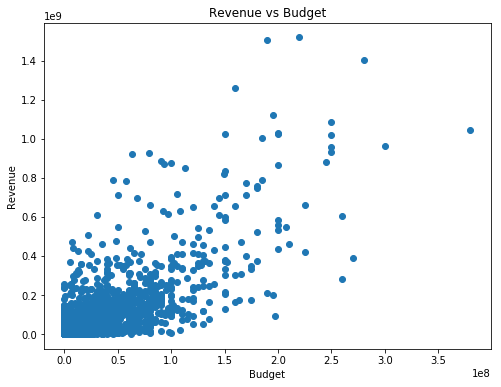

In [8]:
plt.figure(figsize=(8,6))
plt.scatter((train['budget']), (train['revenue']))
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

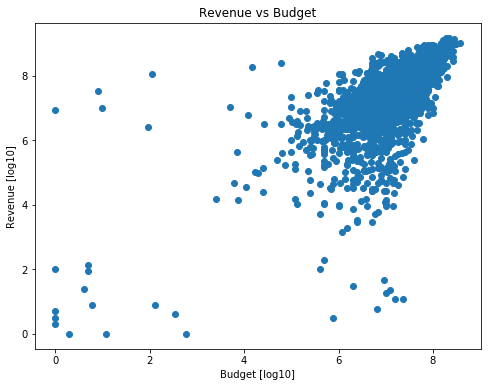

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(np.log10(train['budget']), np.log10(train['revenue']))
plt.title('Revenue vs Budget')
plt.xlabel('Budget [log10]')
plt.ylabel('Revenue [log10]')
plt.show()

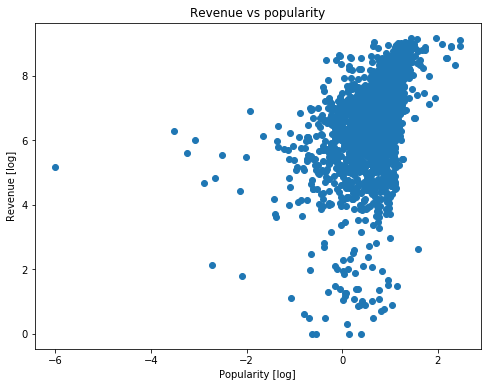

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(np.log10(train['popularity']), np.log10(train['revenue']))
plt.title('Revenue vs popularity')
plt.xlabel('Popularity [log]')
plt.ylabel('Revenue [log]')
plt.show()

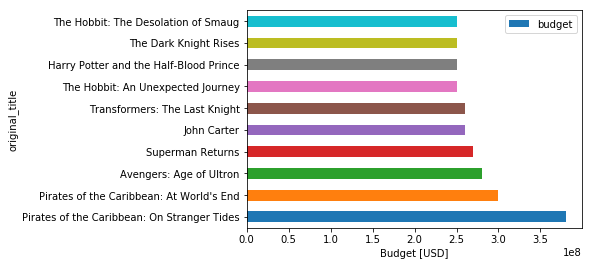

In [11]:
train.sort_values('budget', ascending=False).head(10).plot(x='original_title', y='budget', kind='barh')
plt.xlabel('Budget [USD]');

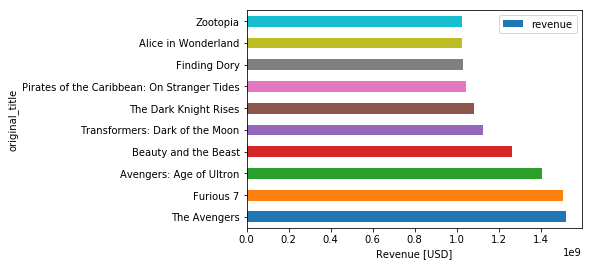

In [12]:
train.sort_values('revenue', ascending=False).head(10).plot(x='original_title', 
                                                            y='revenue', kind='barh')
plt.xlabel('Revenue [USD]');

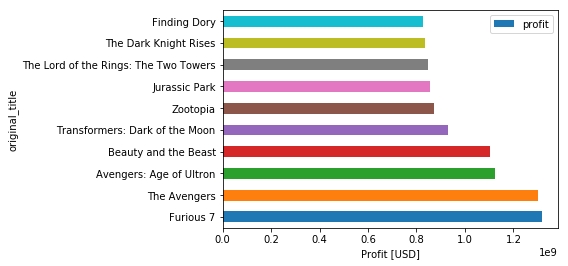

In [13]:
train.assign(profit = lambda df: df['revenue'] - df['budget'] ).sort_values('profit', 
                                   ascending=False).head(10).plot(x='original_title', 
                                                                  y='profit', kind='barh')
plt.xlabel('Profit [USD]');

In [14]:
# Function to parse the first 'name' value from this structure of a list of dictionaries
def parse_json(x):
    try:
        return json.loads(x.replace("'", '"'))[0]['name']
    except:
        return ''

In [15]:
train['genres'].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [16]:
train['genres'] = train['genres'].apply(parse_json)

In [17]:
train['genres'].head()

0      Comedy
1      Comedy
2       Drama
3    Thriller
4      Action
Name: genres, dtype: object

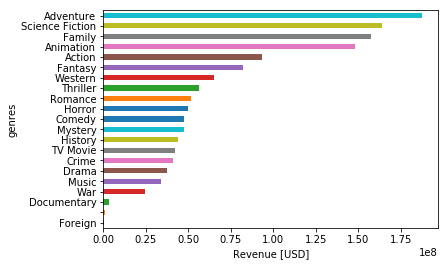

In [18]:
train.groupby('genres')['revenue'].mean().sort_values().plot(kind='barh')
plt.xlabel('Revenue [USD]');

In [19]:
train['collection'] = ~train['belongs_to_collection'].isna()

In [20]:
train['collection'].value_counts()

False    2396
True      604
Name: collection, dtype: int64

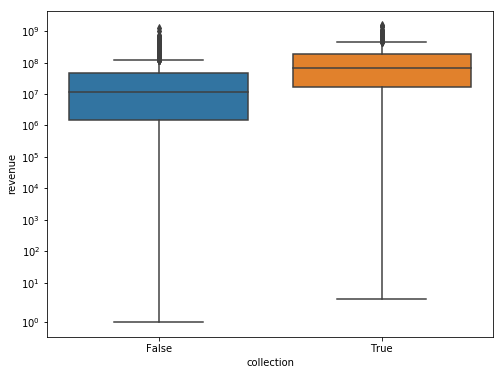

In [21]:
fig, ax= plt.subplots(figsize=(8,6))
ax.set_yscale('symlog')
sns.boxplot(x= 'collection', y='revenue', data=train, ax=ax);

In [22]:
train['production_companies'].head(10)

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
5                                                  NaN
6    [{'name': 'Ghost House Pictures', 'id': 768}, ...
7                                                  NaN
8    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
9    [{'name': 'Castle Rock Entertainment', 'id': 97}]
Name: production_companies, dtype: object

In [23]:
train['production_companies'] = train['production_companies'].apply(parse_json)

In [24]:
train['production_companies'].head(10)

0           Paramount Pictures
1         Walt Disney Pictures
2                   Bold Films
3                             
4                             
5                             
6         Ghost House Pictures
7                             
8         Walt Disney Pictures
9    Castle Rock Entertainment
Name: production_companies, dtype: object

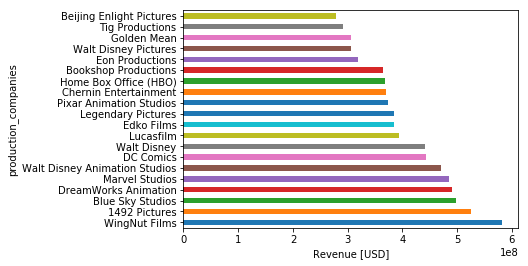

In [25]:
train.groupby('production_companies')['revenue'].mean().sort_values(ascending=False).head(20).plot(kind='barh')
plt.xlabel('Revenue [USD]');

# Data Preperation

##### Sentiment Analysis

In [26]:
# using SentimentIntensityAnalyzer function from the vaderSentiment package
# for an analysis of the sentiment of the films 'overview' and 'tagline'
analyser = SentimentIntensityAnalyzer()

In [27]:
# Fill out the NaNs values in 'overview' and 'tagline'
# with an empty string ('') before processing the analyser scores
train['overview'] = train['overview'].fillna('')
train['tagline'] = train['tagline'].fillna('')

In [28]:
# Sample of vaderSentiment usage
# The Sum of neg, neu, pos is always one
# 'copound' is a composition score of the other values 
analyser.polarity_scores(train['overview'].iloc[0])

{'neg': 0.069, 'neu': 0.747, 'pos': 0.184, 'compound': 0.6124}

In [29]:
# using only the 'compound' output of vaderSentiment on the 'overview' column
# 'compound' gathers the general picture related to sentiment analysis (Composition score)
# x.lower() will convert all the letters into lower case
train['sentiment'] = train['overview'].apply(lambda x: analyser.polarity_scores(x.lower())['compound'])

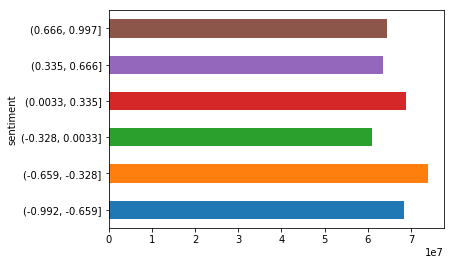

In [30]:
train.groupby(pd.cut(train['sentiment'], 6))['revenue'].mean().plot(kind='barh')

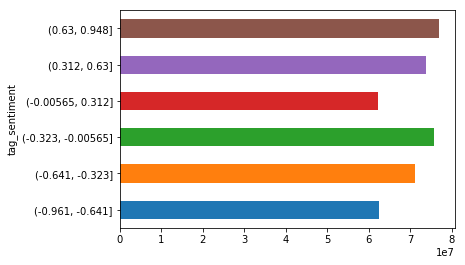

In [31]:
# using only the 'compound' output of vaderSentiment on the 'tagline' column
# 'compound' gathers the general picture related to sentiment analysis (Composition score)
train['tag_sentiment'] = train['tagline'].apply(lambda x: analyser.polarity_scores(x.lower())['compound'])
train.groupby(pd.cut(train['tag_sentiment'], 6))['revenue'].mean().plot(kind='barh')

In [32]:
# As we can see from the sentiment analysis, there is (almost) no correlation between
# the 'compound' value generated by vaderSentiment package (a composition sentiment value)
# To the 'overview' and 'tagline' columns.
train[['tag_sentiment', 'sentiment']].corrwith(train['revenue'])

tag_sentiment    0.014762
sentiment       -0.020765
dtype: float64

In [33]:
import ast

In [34]:
# Helper function to parse text and convert given strings to lists 
def text_to_list(x):
    if pd.isna(x):
        return ''
    else:
        return ast.literal_eval(x)

#### Sample of usages with text_to_list

In [35]:
# '[3,4,5,6]' is a string, it is not a list, using the function will convert it to a list
ast.literal_eval('[3,4,5,6]')

[3, 4, 5, 6]

In [36]:
# Another example of usage
ast.literal_eval("[{'id': 35, 'name': 'Comedy'}]")

[{'id': 35, 'name': 'Comedy'}]

In [37]:
# Load the Train and Test sets and keep the size of the sets in two variables (ntrain, ntest)
train = pd.read_csv('train.csv')
ntrain = train.shape[0]
test = pd.read_csv('test.csv')
ntest = test.shape[0]

In [38]:
# Combine the train and the test sets, all the data preparations
# will be done on the combined set.
# The combined set will be split again at the end of the preparation step
combined = pd.concat((train, test), sort=False)

In [39]:
combined.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0


In [40]:
# Drop all of the not-relevant columns from the combined dataset
# Columns that will not contribute to predicting the revenue
combined.drop(columns=['id','imdb_id', 'poster_path', 'title', 'original_title'], inplace=True)

In [41]:
combined.head()

,belongs_to_collection,budget,genres,homepage,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651.0
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000.0
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970.0


In [42]:
# Preparation for the parsing step applying 'text_to_list' function on the relevant columns
for col in ['genres', 'production_companies', 'production_countries', \
            'spoken_languages', 'Keywords', 'cast', 'crew']:
    combined[col] = combined[col].apply(text_to_list)

In [43]:
combined['belongs_to_collection'].head()

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object

In [44]:
# Converts the 'belogs_to_collection' column to a zero/one column
# Every value that includes some value (meaning the movie belong to a collection) 
# will be converted to 1.
# Every value that includes a NaN (meaning the movie does not belong to a collection) 
# will be converted to 0. 
combined['belongs_to_collection'] = 1*(~combined['belongs_to_collection'].isna())

In [45]:
combined['belongs_to_collection'].head()

0    1
1    1
2    0
3    0
4    0
Name: belongs_to_collection, dtype: int64

In [46]:
# Reminder, a Sentiment analysis Revealed that there is no correlation between
# the columns: 'overview' and 'tagline' to the 'revenue' column. (our predicted column)
# Hence, we will create a binary label for each movie 'tagline' (and for 'homepage' as well later) 
# (for every movie: has or has not a 'tagline' and a 'homepage')
# The second step will be to create a new feature with an overview of characters count.
combined['tagline'] = 1*(~combined['tagline'].isna())

In [47]:
combined['tagline'].head()

0    1
1    1
2    1
3    0
4    0
Name: tagline, dtype: int64

In [48]:
combined['homepage'] = 1*(~combined['homepage'].isna())

In [49]:
combined['homepage'].head()

0    0
1    0
2    1
3    1
4    0
Name: homepage, dtype: int64

In [50]:
# New feature includes the number of characters in each movie's overview
combined['overview'] = combined['overview'].str.len()
# Any movie without an overview (Nan) will set to zero
combined['overview'].fillna(0, inplace=True)

In [51]:
combined['overview'].head()

0    155.0
1    393.0
2    130.0
3    581.0
4    168.0
Name: overview, dtype: float64

In [52]:
# Create a new feature contains the NUMBER of genres for each movie
combined['genre_number'] = combined['genres'].apply(lambda x: len(x))

In [53]:
combined['genre_number'].head()

0    1
1    4
2    1
3    2
4    2
Name: genre_number, dtype: int64

In [54]:
combined['genre_number'].value_counts()

2    2379
3    2208
1    1488
4     967
5     280
6      48
0      23
7       4
8       1
Name: genre_number, dtype: int64

In [55]:
# function to parse the genre of a movie.
# few movies do not have a genre value, some have more than one genre value
# the function will parse only the first 3 genres (if exist)
# and create 3 new columns named: 'genres1', 'genres2', 'genres3'
# in the combined dataset.
def parse_genre(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['genres1', 'genres2', 'genres3'] )
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['genres1', 'genres2', 'genres3'] )
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['genres1', 'genres2', 'genres3'] )
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['genres1', 'genres2', 'genres3'] )

In [56]:
# Apply the function to create 3 new columns 
# and drop the original 'genres' column
combined[['genres1', 'genres2', 'genres3']] = 
                        combined['genres'].apply(parse_genre)
combined.drop(columns='genres', inplace=True)

In [57]:
combined['genres1'].head()

0      Comedy
1      Comedy
2       Drama
3    Thriller
4      Action
Name: genres1, dtype: object

In [58]:
# Create a new column with the number of production companies related to each movie
combined['production_company_number'] = combined['production_companies'].apply(lambda x: len(x))

In [59]:
# function to parse the production companies of a movie.
# few movies do not have a production companies value, some have more than one value
# the function will parse only the first 3 production companies (if exist)
# and create 3 new columns named: 'prod1', 'prod2', 'prod3'
# in the combined dataset
def parse_production_companies(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['prod1', 'prod2', 'prod3'] )
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['prod1', 'prod2', 'prod3'] )
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['prod1', 'prod2', 'prod3'] )
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['prod1', 'prod2', 'prod3'] )

In [60]:
# Apply the function to create 3 new columns 
# and drop the original 'production companies' column
combined[['prod1', 'prod2', 'prod3']] = 
            combined['production_companies'].apply(parse_production_companies)
combined.drop(columns='production_companies', inplace=True)

In [61]:
combined['prod1'].head(20)

0                         Paramount Pictures
1                       Walt Disney Pictures
2                                 Bold Films
3                                           
4                                           
5                                           
6                       Ghost House Pictures
7                                           
8                       Walt Disney Pictures
9                  Castle Rock Entertainment
10                            United Artists
11    Twentieth Century Fox Film Corporation
12                            DreamWorks SKG
13                      Double Feature Films
14                            DreamWorks SKG
15                                Hypnopolis
16                            DreamWorks SKG
17                                 BBC Films
18                           UK Film Council
19    Twentieth Century Fox Film Corporation
Name: prod1, dtype: object

In [62]:
# Create a new column with the number of production countries related to each movie 
combined['production_country_number'] = combined['production_countries'].apply(lambda x: len(x))

In [63]:
# function to parse the production countries of a movie.
# few movies do not have a production countries value, some have more than one value
# the function will parse only the first 3 production countries (if exist)
# and create 3 new columns named: 'country1', 'country2', 'country3'
# in the combined dataset
def parse_production_countries(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['country1', 'country2', 'country3'] )
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['country1', 'country2', 'country3'] )
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['country1', 'country2', 'country3'] )
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['country1', 'country2', 'country3'] )

In [64]:
# Apply the function to create 3 new columns and drop the original 'production companies' column
combined[['country1', 'country2', 'country3']] = 
                combined['production_countries'].apply(parse_production_countries)
combined.drop(columns='production_countries', inplace=True)

In [65]:
combined.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,release_date,runtime,spoken_languages,status,...,genres2,genres3,production_company_number,prod1,prod2,prod3,production_country_number,country1,country2,country3
0,1,14000000,0,en,155.0,6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,,,3,Paramount Pictures,United Artists,Metro-Goldwyn-Mayer (MGM),1,United States of America,,
1,1,40000000,0,en,393.0,8.248895,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,Drama,Family,1,Walt Disney Pictures,,,1,United States of America,,
2,0,3300000,1,en,130.0,64.299990,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,,,3,Bold Films,Blumhouse Productions,Right of Way Films,1,United States of America,,
3,0,1200000,1,hi,581.0,3.174936,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...,Drama,,0,,,,1,India,,
4,0,0,0,ko,168.0,1.148070,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,...,Thriller,,0,,,,1,South Korea,,


In [66]:
# Parse and break-down the date column ('release_date' column)
combined['release_date'] = pd.to_datetime(combined['release_date'], format='%m/%d/%y')

# Parse 'weekday'
combined['weekday'] = combined['release_date'].dt.weekday

# fill Nan in 'weekday' column with the most common weekday value - 4
combined['weekday'].fillna(4, inplace=True)

# Parse 'month'
combined['month'] = combined['release_date'].dt.month

# fill Nan in 'month' with the most common month value - 9
combined['month'].fillna(9, inplace=True)

# Parse 'year'
combined['year'] = combined['release_date'].dt.year

# fill Nan in 'year' with the median value of the 'year' column
combined['year'].fillna(combined['year'].median(), inplace=True)

# Parse 'day'
combined['day'] = combined['release_date'].dt.day

# fill Nan with the most common day value - 1
combined['day'].fillna(1, inplace=True)

# Drop the original 'release_date' column
combined.drop(columns =['release_date'], inplace=True)

In [67]:
combined.head(5)

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,spoken_languages,status,tagline,...,prod2,prod3,production_country_number,country1,country2,country3,weekday,month,year,day
0,1,14000000,0,en,155.0,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,...,United Artists,Metro-Goldwyn-Mayer (MGM),1,United States of America,,,4.0,2.0,2015.0,20.0
1,1,40000000,0,en,393.0,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,...,,,1,United States of America,,,4.0,8.0,2004.0,6.0
2,0,3300000,1,en,130.0,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,...,Blumhouse Productions,Right of Way Films,1,United States of America,,,4.0,10.0,2014.0,10.0
3,0,1200000,1,hi,581.0,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,0,...,,,1,India,,,4.0,3.0,2012.0,9.0
4,0,0,0,ko,168.0,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,0,...,,,1,South Korea,,,3.0,2.0,2009.0,5.0


In [68]:
# fill the Nan values in the 'runtime' column with the median value
combined['runtime'].fillna(combined['runtime'].median(), inplace=True)

In [69]:
# Create a new column with the number of spoken languages for each movie
combined['spoken_languages_number'] = combined['spoken_languages'].apply(lambda x: len(x))

In [70]:
combined.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,spoken_languages,status,tagline,...,prod3,production_country_number,country1,country2,country3,weekday,month,year,day,spoken_languages_number
0,1,14000000,0,en,155.0,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,...,Metro-Goldwyn-Mayer (MGM),1,United States of America,,,4.0,2.0,2015.0,20.0,1
1,1,40000000,0,en,393.0,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,...,,1,United States of America,,,4.0,8.0,2004.0,6.0,1
2,0,3300000,1,en,130.0,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,...,Right of Way Films,1,United States of America,,,4.0,10.0,2014.0,10.0,1
3,0,1200000,1,hi,581.0,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,0,...,,1,India,,,4.0,3.0,2012.0,9.0,2
4,0,0,0,ko,168.0,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,0,...,,1,South Korea,,,3.0,2.0,2009.0,5.0,1


In [71]:
# function to parse the spoken languages of a movie.
# few movies do not have a spoken languages value, some have more than one value
# the function will parse only the first 3 spoken languages (if exist)
# and create 3 new columns named: 'lang1', 'lang2', 'lang3'
# in the combined dataset
def parse_spoken_languages(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['lang1', 'lang2', 'lang3'])
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['lang1', 'lang2', 'lang3'])
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['lang1', 'lang2', 'lang3'])
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['lang1', 'lang2', 'lang3'])

In [72]:
# Apply the function to create 3 new columns and drop the original 'spoken languages' column
combined[['lang1', 'lang2', 'lang3']] = 
            combined['spoken_languages'].apply(parse_spoken_languages)
combined.drop(columns='spoken_languages', inplace=True)

In [73]:
combined.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,status,tagline,Keywords,...,country2,country3,weekday,month,year,day,spoken_languages_number,lang1,lang2,lang3
0,1,14000000,0,en,155.0,6.575393,93.0,Released,1,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",...,,,4.0,2.0,2015.0,20.0,1,English,,
1,1,40000000,0,en,393.0,8.248895,113.0,Released,1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",...,,,4.0,8.0,2004.0,6.0,1,English,,
2,0,3300000,1,en,130.0,64.299990,105.0,Released,1,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",...,,,4.0,10.0,2014.0,10.0,1,English,,
3,0,1200000,1,hi,581.0,3.174936,122.0,Released,0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",...,,,4.0,3.0,2012.0,9.0,2,English,हिन्दी,
4,0,0,0,ko,168.0,1.148070,118.0,Released,0,,...,,,3.0,2.0,2009.0,5.0,1,한국어/조선말,,


In [74]:
# Most of the 'status' column values are 'Released'
# hence, the Nan values in this column will change to 'Released'
combined['status'].fillna('Released', inplace=True)

In [75]:
# Create a new column with the number of Keywords for each movie
combined['keywords_number'] = combined['Keywords'].apply(lambda x: len(x))

In [ ]:
# function to parse the Keywords of a movie.
# few movies do not have a keywords value, some have more than one value
# the function will parse only the first 3 keywords (if exist)
# and create 3 new columns named: 'key1', 'key2', 'key3'
# in the combined dataset
def parse_keywords(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['key1', 'key2', 'key3'])
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['key1', 'key2', 'key3'])
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['key1', 'key2', 'key3'])
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['key1', 'key2', 'key3'])

In [76]:
# Apply the function to create 3 new columns and drop the original 'Keywords' column
combined[['key1', 'key2', 'key3']] = combined['Keywords'].apply(parse_keywords)
combined.drop(columns='Keywords', inplace=True)

In [77]:
combined.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,status,tagline,cast,...,year,day,spoken_languages_number,lang1,lang2,lang3,keywords_number,key1,key2,key3
0,1,14000000,0,en,155.0,6.575393,93.0,Released,1,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",...,2015.0,20.0,1,English,,,4,time travel,sequel,hot tub
1,1,40000000,0,en,393.0,8.248895,113.0,Released,1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",...,2004.0,6.0,1,English,,,4,coronation,duty,marriage
2,0,3300000,1,en,130.0,64.299990,105.0,Released,1,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",...,2014.0,10.0,1,English,,,12,jazz,obsession,conservatory
3,0,1200000,1,hi,581.0,3.174936,122.0,Released,0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",...,2012.0,9.0,2,English,हिन्दी,,7,mystery,bollywood,police corruption
4,0,0,0,ko,168.0,1.148070,118.0,Released,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",...,2009.0,5.0,1,한국어/조선말,,,0,,,


In [78]:
# Create 3 new features.
# Counting the number of the cast for genders 0,1,2 for each movie.
combined['gender_0_number'] = combined['cast'].apply(lambda row: sum([x['gender'] == 0 for x in row]))
combined['gender_1_number'] = combined['cast'].apply(lambda row: sum([x['gender'] == 1 for x in row]))
combined['gender_2_number'] = combined['cast'].apply(lambda row: sum([x['gender'] == 2 for x in row]))

In [79]:
# Sample to observe one of the new columns head
combined['gender_0_number'].head()

0     6
1     0
2    31
3     4
4     0
Name: gender_0_number, dtype: int64

In [80]:
combined.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'original_language',
       'overview', 'popularity', 'runtime', 'status', 'tagline', 'cast',
       'crew', 'revenue', 'genre_number', 'genres1', 'genres2', 'genres3',
       'production_company_number', 'prod1', 'prod2', 'prod3',
       'production_country_number', 'country1', 'country2', 'country3',
       'weekday', 'month', 'year', 'day', 'spoken_languages_number', 'lang1',
       'lang2', 'lang3', 'keywords_number', 'key1', 'key2', 'key3',
       'gender_0_number', 'gender_1_number', 'gender_2_number'],
      dtype='object')

In [81]:
combined.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,status,tagline,cast,...,lang1,lang2,lang3,keywords_number,key1,key2,key3,gender_0_number,gender_1_number,gender_2_number
0,1,14000000,0,en,155.0,6.575393,93.0,Released,1,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",...,English,,,4,time travel,sequel,hot tub,6,8,10
1,1,40000000,0,en,393.0,8.248895,113.0,Released,1,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",...,English,,,4,coronation,duty,marriage,0,10,10
2,0,3300000,1,en,130.0,64.299990,105.0,Released,1,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",...,English,,,12,jazz,obsession,conservatory,31,7,13
3,0,1200000,1,hi,581.0,3.174936,122.0,Released,0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",...,English,हिन्दी,,7,mystery,bollywood,police corruption,4,1,2
4,0,0,0,ko,168.0,1.148070,118.0,Released,0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",...,한국어/조선말,,,0,,,,0,0,4


In [82]:
# Create a new column with the number of cast values for each movie
combined['cast_number'] = combined['cast'].apply(lambda x: len(x))

In [83]:
# Parsing the cast column.
# Taking the first five cast members by their cast_id values
# and creating five cast-related new columns 
def parse_cast(x):
    myindx = ['cast1', 'cast2', 'cast3', 'cast4', 'cast5']
    out = [-1]*5
    if type(x) != str:
        for i in range(min([5,len(x)])):
            out[i] = x[i]['id']
    return pd.Series(out, index=myindx)

In [84]:
# Apply the function to create 5 new columns and drop the original 'cast' column
combined[['cast1', 'cast2', 'cast3', 'cast4', 'cast5']] = combined['cast'].apply(parse_cast)
combined.drop(columns='cast', inplace=True)

In [85]:
combined.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,status,tagline,crew,...,key3,gender_0_number,gender_1_number,gender_2_number,cast_number,cast1,cast2,cast3,cast4,cast5
0,1,14000000,0,en,155.0,6.575393,93.0,Released,1,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",...,hot tub,6,8,10,24,52997,64342,54729,36801,54812
1,1,40000000,0,en,393.0,8.248895,113.0,Released,1,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",...,marriage,0,10,10,20,1813,5823,1210,655,33656
2,0,3300000,1,en,130.0,64.299990,105.0,Released,1,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",...,conservatory,31,7,13,51,996701,18999,129104,970216,223012
3,0,1200000,1,hi,581.0,3.174936,122.0,Released,0,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",...,police corruption,4,1,2,7,35068,85047,1021524,1093644,86033
4,0,0,0,ko,168.0,1.148070,118.0,Released,0,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",...,,0,0,4,4,84751,64453,84752,1130534,-1


In [86]:
# Create a new column with the number of crew values for each movie
combined['crew_number'] = combined['crew'].apply(lambda x: len(x))

In [87]:
# function to parse the Director and Producer from the 'crew' column
def parse_crew(x):
    myindx = ['Director', 'Producer']
    out = [-1]*2
    if type(x) != str:
        for item in x:
            if item['job'] == 'Director':
                out[0] = item['id']
            elif item['job'] == 'Producer':
                out[1] = item['id']
    return pd.Series(out, index=myindx)

In [88]:
# Apply the function to create 2 new columns and drop the original 'crew' column
combined[['Director', 'Producer']] = combined['crew'].apply(parse_crew)
combined.drop(columns='crew', inplace=True)

In [89]:
# Create two new columns (features) for the two columns that contain Numeric Values ('budget', 'popularity')
# using np.log1p (calculate log(1 + x)) since there is a possibility that we will have a zero value
# and log of zero does not exist.
# RandomForest or light_gbm models can use both features without a conflict,
# moreover, these two new features contribute to the models' accuracy.
combined['budget_log'] = np.log1p(combined['budget'])
combined['pop_log'] = np.log1p(combined['popularity'])

#### Apply LabelEncoder on the the new generated columns, fit and transform as a second step

In [90]:
# Check the 'key1', 'key2', 'key3' columns Before the label encoding fitting and transforming
combined[['genres1', 'genres2', 'genres3']].head()

,genres1,genres2,genres3
0,Comedy,,
1,Comedy,Drama,Family
2,Drama,,
3,Thriller,Drama,
4,Action,Thriller,


In [91]:
cols = ['genres1', 'genres2', 'genres3']
allitems = list(set(combined[cols].values.ravel().tolist()))
labeler = LabelEncoder()
labeler.fit(allitems)
combined[cols] = combined[cols].apply(lambda x: labeler.transform(x))

In [92]:
# Check the 'key1', 'key2', 'key3' columns After the label encoding fitting and transforming
combined[['genres1', 'genres2', 'genres3']].head()

,genres1,genres2,genres3
0,4,0,0
1,4,7,8
2,7,0,0
3,18,7,0
4,1,18,0


#### The same process applied on the other 4 generated feature-groups

In [93]:
cols = ['prod1', 'prod2', 'prod3']
allitems = list(set(combined[cols].values.ravel().tolist()))
labeler = LabelEncoder()
labeler.fit(allitems)
combined[cols] = combined[cols].apply(lambda x: labeler.transform(x))

In [94]:
cols = ['country1', 'country2', 'country3']
allitems = list(set(combined[cols].values.ravel().tolist()))
labeler = LabelEncoder()
labeler.fit(allitems)
combined[cols] = combined[cols].apply(lambda x: labeler.transform(x))

In [95]:
cols = ['lang1', 'lang2', 'lang3']
allitems = list(set(combined[cols].values.ravel().tolist()))
labeler = LabelEncoder()
labeler.fit(allitems)
combined[cols] = combined[cols].apply(lambda x: labeler.transform(x))

In [96]:
cols = ['key1', 'key2', 'key3']
allitems = list(set(combined[cols].values.ravel().tolist()))
labeler = LabelEncoder()
labeler.fit(allitems)
combined[cols] = combined[cols].apply(lambda x: labeler.transform(x))

#### Apply LabelEncoder on the category columns

In [97]:
# find the category columns that left
combined.select_dtypes('object').columns

Index(['original_language', 'status'], dtype='object')

In [98]:
combined.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,status,tagline,revenue,...,cast1,cast2,cast3,cast4,cast5,crew_number,Director,Producer,budget_log,pop_log
0,1,14000000,0,en,155.0,6.575393,93.0,Released,1,12314651.0,...,52997,64342,54729,36801,54812,72,3227,57822,16.454568,2.024905
1,1,40000000,0,en,393.0,8.248895,113.0,Released,1,95149435.0,...,1813,5823,1210,655,33656,9,1201,59973,17.504390,2.224504
2,0,3300000,1,en,130.0,64.299990,105.0,Released,1,13092000.0,...,996701,18999,129104,970216,223012,64,136495,1287961,15.009433,4.178992
3,0,1200000,1,hi,581.0,3.174936,122.0,Released,0,16000000.0,...,35068,85047,1021524,1093644,86033,3,95510,95510,13.997833,1.429099
4,0,0,0,ko,168.0,1.148070,118.0,Released,0,3923970.0,...,84751,64453,84752,1130534,-1,2,84749,-1,0.000000,0.764570


In [99]:
# Label Encode the two left category column
combined_dummy = combined.copy()
cat_col = combined.select_dtypes('object').columns
combined_dummy[cat_col] = combined_dummy[cat_col].apply(lambda x: LabelEncoder().fit_transform(x))

In [100]:
combined_dummy.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,status,tagline,revenue,...,cast1,cast2,cast3,cast4,cast5,crew_number,Director,Producer,budget_log,pop_log
0,1,14000000,0,10,155.0,6.575393,93.0,1,1,12314651.0,...,52997,64342,54729,36801,54812,72,3227,57822,16.454568,2.024905
1,1,40000000,0,10,393.0,8.248895,113.0,1,1,95149435.0,...,1813,5823,1210,655,33656,9,1201,59973,17.504390,2.224504
2,0,3300000,1,10,130.0,64.299990,105.0,1,1,13092000.0,...,996701,18999,129104,970216,223012,64,136495,1287961,15.009433,4.178992
3,0,1200000,1,16,581.0,3.174936,122.0,1,0,16000000.0,...,35068,85047,1021524,1093644,86033,3,95510,95510,13.997833,1.429099
4,0,0,0,24,168.0,1.148070,118.0,1,0,3923970.0,...,84751,64453,84752,1130534,-1,2,84749,-1,0.000000,0.764570


In [101]:
# Split the combined dataset back to Test and Train sets
train_data = combined_dummy.iloc[:ntrain]
test_data = combined_dummy.iloc[-ntest:]

In [102]:
train_data.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,status,tagline,revenue,...,cast1,cast2,cast3,cast4,cast5,crew_number,Director,Producer,budget_log,pop_log
0,1,14000000,0,10,155.0,6.575393,93.0,1,1,12314651.0,...,52997,64342,54729,36801,54812,72,3227,57822,16.454568,2.024905
1,1,40000000,0,10,393.0,8.248895,113.0,1,1,95149435.0,...,1813,5823,1210,655,33656,9,1201,59973,17.504390,2.224504
2,0,3300000,1,10,130.0,64.299990,105.0,1,1,13092000.0,...,996701,18999,129104,970216,223012,64,136495,1287961,15.009433,4.178992
3,0,1200000,1,16,581.0,3.174936,122.0,1,0,16000000.0,...,35068,85047,1021524,1093644,86033,3,95510,95510,13.997833,1.429099
4,0,0,0,24,168.0,1.148070,118.0,1,0,3923970.0,...,84751,64453,84752,1130534,-1,2,84749,-1,0.000000,0.764570


In [103]:
#export to csv file to view the final clean dataset
#train_data.to_csv('out_for_check.csv')

In [104]:
train_data.shape

(3000, 48)

In [105]:
# Drop the 'revenue' column, it is the values to predict 
X_train = train_data.drop(columns='revenue').values

# The log transformation of the revenue gives better results, hence, we will use it
y_train = np.log1p(train_data['revenue'].values)

# Drop the 'revenue' column, will be filled at the end when the model will be ready
X_test = test_data.drop(columns='revenue').values

# The Models

#### Start with a basic Linear Regression Model

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [107]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [108]:
lr = LinearRegression()
y_pred = cross_val_predict(lr, X_train, y_train, cv=kf)
y_pred[y_pred < 0 ] = 0

# print a result for kaggle website competition format
print('RMSLE: {0:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred))))

RMSLE: 2.24


#### Continue with a random forest regression model (Improved result comparing to the LinearRegression try)

In [118]:
rf = RandomForestRegressor(max_depth=20, random_state=123, n_estimators=100)
y_pred = cross_val_predict(rf, X_train, y_train, cv=kf)
y_pred[y_pred < 0 ] = 0

# print a result for kaggle website competition
print('RMSLE: {0:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred))))

RMSLE: 2.18


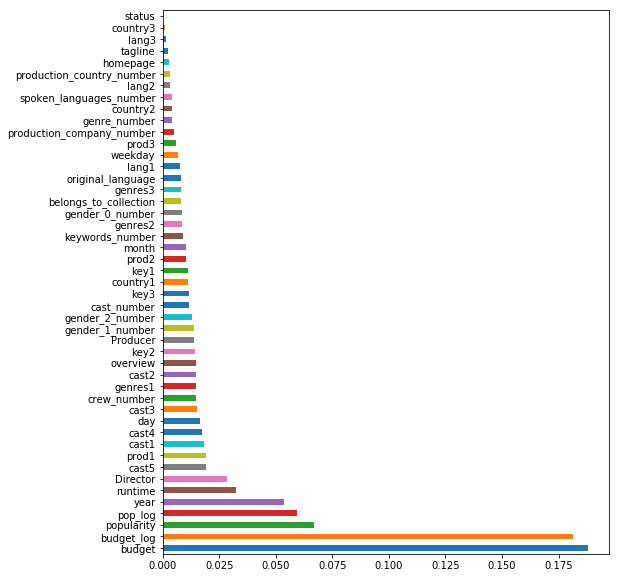

In [121]:
# View the importance of the features of the random forest model in a bar plot.
# dropping the revenue column before 
rf.fit(X_train, y_train)
imp = pd.Series(rf.feature_importances_, index=train_data.drop(columns='revenue').columns)
imp.sort_values(ascending=False).plot(kind='barh', figsize=(8,10))

#### Continue with a LGBMRegressor Model (fast execution) the results improved comparing to the RandomForestRegressor try

In [123]:
import lightgbm as lgb

In [124]:
# the parameters of this model explanation:
# 0.4 means that for each of the 1500 (n_estimator) only 40% of the features 
# will be selected (randomly).
# max_depth is inf (-1) but is restricted by the leaves number (20)
lgb_model = lgb.LGBMRegressor(num_leaves=20, max_depth=-1, learning_rate=0.01, 
                              metrics='rmse', n_estimators=1500, feature_fraction = 0.4)

y_pred = cross_val_predict(lgb_model, X_train, y_train, cv=kf)

# print a result for kaggle website competition
print('RMSLE: {0:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred))))

RMSLE: 2.10


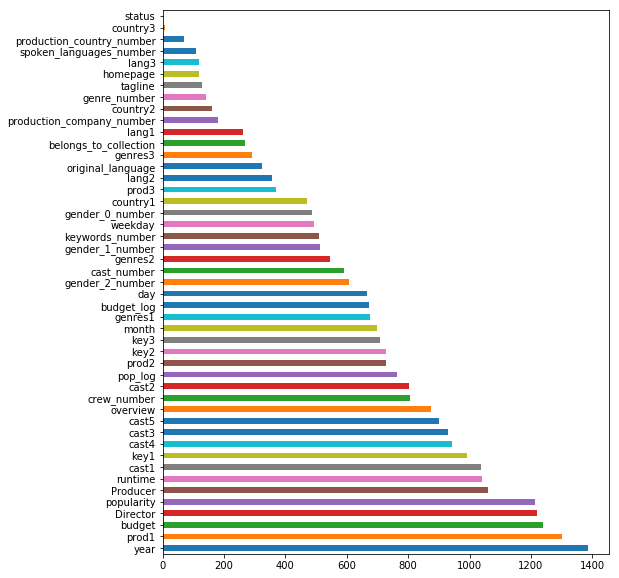

In [125]:
# View the importance of the features of the LGBMRegressor model in a bar plot.
# dropping the revenue column before 
# According to this model, the year is the most important feature in predicting the revenue
# and that makes sense, as the years pass, the revenue increase. (across all Industries)
# The second important feature according to this model is the production company, budget, director..
# The choices of this model are relevant and lead to a better prediction outcome, compare to 
# the previous two models that I tried. 

lgb_model.fit(X_train, y_train)
imp = pd.Series(lgb_model.feature_importances_, index=train_data.drop(columns='revenue').columns)
imp.sort_values(ascending=False).plot(kind='barh', figsize=(8,10))

In [115]:
# Preparing the format needed for submission to kaggle website
pred = lgb_model.predict(X_test)
sub = pd.DataFrame()
sub['id'] = test['id']
sub['revenue'] = np.expm1(pred)
sub.to_csv('mysubmission2.csv', index=False)